In [1]:
import numpy as np
import ROOT

file_prefiring_maps = ROOT.TFile.Open( "l1_prefiring/JetPrefiringMapsperIOV_EOY.root", "READ" )

Welcome to JupyROOT 6.24/00


In [2]:
file_prefiring_maps.ls()

TFile**		l1_prefiring/JetPrefiringMapsperIOV_EOY.root	
 TFile*		l1_prefiring/JetPrefiringMapsperIOV_EOY.root	
  KEY: TH2F	L1prefiring_jetpt_2016BCD;1	
  KEY: TH2F	L1prefiring_jetpt_2016EF;1	
  KEY: TH2F	L1prefiring_jetpt_2016FGH;1	
  KEY: TH2F	L1prefiring_jetpt_2017B;1	
  KEY: TH2F	L1prefiring_jetpt_2017C;1	
  KEY: TH2F	L1prefiring_jetpt_2017D;1	
  KEY: TH2F	L1prefiring_jetpt_2017E;1	
  KEY: TH2F	L1prefiring_jetpt_2017F;1	


In [40]:
h_L1prefiring_jetpt_ = file_prefiring_maps.Get( "L1prefiring_jetpt_2017F" )
h_L1prefiring_jetpt_

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas1


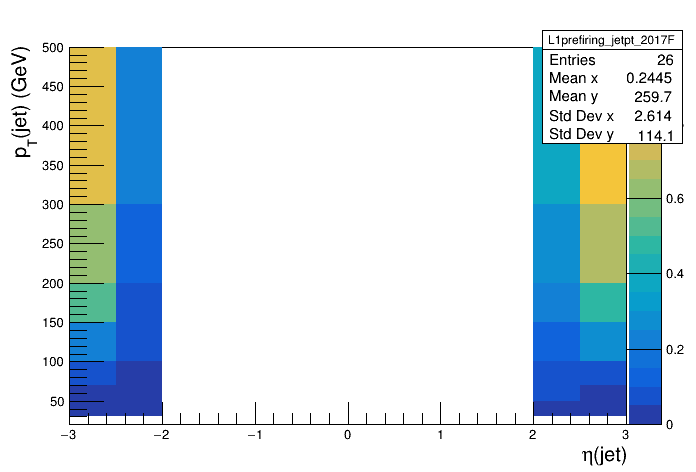

In [41]:
canvas1 = ROOT.TCanvas( "canvas1" )
h_L1prefiring_jetpt_.Draw( "COLZ" )
canvas1.Draw()

In [42]:
nBinsX_ = h_L1prefiring_jetpt_.GetNbinsX()
nBinsY_ = h_L1prefiring_jetpt_.GetNbinsY()
print ( nBinsX_, nBinsY_)
for bin_ in range( 1, nBinsX_ + 1 ):
    print ( h_L1prefiring_jetpt_.GetXaxis().GetBinLowEdge( bin_ ), h_L1prefiring_jetpt_.GetXaxis().GetBinUpEdge( bin_ ) )
for bin_ in range( 1, nBinsY_ + 1 ):
    print ( h_L1prefiring_jetpt_.GetYaxis().GetBinLowEdge( bin_ ), h_L1prefiring_jetpt_.GetYaxis().GetBinUpEdge( bin_ ) )

7 13
-5.0 -3.0
-3.0 -2.5
-2.5 -2.0
-2.0 2.0
2.0 2.5
2.5 3.0
3.0 5.0
10.0 15.0
15.0 20.0
20.0 25.0
25.0 30.0
30.0 35.0
35.0 40.0
40.0 50.0
50.0 70.0
70.0 100.0
100.0 150.0
150.0 200.0
200.0 300.0
300.0 500.0


In [43]:
eta_ = -3.
pt_ = 50.
bin2D_ = h_L1prefiring_jetpt_.FindBin( eta_, pt_ )
h_L1prefiring_jetpt_.GetBinContent( bin2D_ )

0.02946593053638935

In [63]:
class L1PrefiringProb:
    def __init__( self, histos ):
        self.histos_ = histos
        self.jet_min_pt_ = 20.
        self.jet_max_pt_ = 500.
        self.jet_min_eta_ = 2.
        self.jet_max_eta_ = 3.
    def __call__( self, pt, eta, data_period ):
        prob_ = 0.
        unc_ = 0.
        if ( ( np.abs( eta ) >= self.jet_min_eta_ ) and
             ( np.abs( eta ) <= self.jet_max_eta_ ) and
             ( pt >= self.jet_min_pt_ ) and
             ( pt <= self.jet_max_pt_ ) ):
            h_L1prefiring_ = self.histos_[ data_period ]
            bin2D_ = h_L1prefiring_.FindBin( eta, pt )
            prob_ = h_L1prefiring_.GetBinContent( bin2D_ )
            prob_ = np.min( ( prob_, 1. ) )
            err_ = h_L1prefiring_.GetBinError( bin2D_ )
            unc_ = np.sqrt( err_ ** 2 + ( 0.20 * prob_ ) ** 2 )
        return ( prob_, unc_ )

In [64]:
periods = [ "2016BCD", "2016EF", "2016FGH", "2017B", "2017C", "2017D", "2017E", "2017F" ]
histos = {}
for period_ in periods:
    histos[ period_ ] = file_prefiring_maps.Get( "L1prefiring_jetpt_" + period_ )
histos

{'2016BCD': <cppyy.gbl.TH2F object at 0x86e0930>,
 '2016EF': <cppyy.gbl.TH2F object at 0x86f54a0>,
 '2016FGH': <cppyy.gbl.TH2F object at 0x86f4fd0>,
 '2017B': <cppyy.gbl.TH2F object at 0x78ec3e0>,
 '2017C': <cppyy.gbl.TH2F object at 0x86f6920>,
 '2017D': <cppyy.gbl.TH2F object at 0x86e4990>,
 '2017E': <cppyy.gbl.TH2F object at 0x86f5cf0>,
 '2017F': <cppyy.gbl.TH2F object at 0x14b0a00>}

In [65]:
l1_prefiring_prob_ = L1PrefiringProb( histos=histos )

In [79]:
period_ = "2017F"
eta_ = -2.5
pt_ = 400.
l1_prefiring_prob_( pt_, eta_, period_ )

(0.20476190745830536, 0.04321346557183005)